t="Timestamp" 

__id="MACofScanDevice"__ A unique ID of a network device.  The ﬁrst of these 3 sets of pairs of digits, i.e., mm:mm:mm, identiﬁes the manufacturer of the equipment. The second set of 3 pairs (the ss) identiﬁes the particular piece of equipment, both the model and the unique device. 

__pos="RealPosition"__ the physical coordinate of the scanning device 

__degree="orientation"__ the orientation of the user carrying the scanning device in degrees

__MACofResponse1="SignalStrengthValue,Frequency,Mode"__ MACaddressofarespondingpeer(e.g.,anaccesspointoradevice in adhoc mode) with the corresponding values for signal strength in dBm (Decibel-milliwatts), the channel frequency and its mode (access point = 3, device in adhoc mode = 1)

__MACofResponseN="SignalStrengthValue,Frequency,Mode"__ "..."

In [1]:
#set working directory
setwd('C:/Users/danie/Documents/GitHub/Quantifying-The-World/Case Study 1')
#Load Data
txt = readLines("offline.final.trace.txt") 

In [2]:
head(txt)

[1] "# timestamp=2006-02-11 08:31:58"                                                                                                                                                                                                                                                                                                                                                                                                                                 
[2] "# usec=250"                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[3] "# minReadings=110"                                                                                                                                                                                                                                                                                                                                                                                                                                               
[4] "t=1139643118358;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:0f:a3:39:e1:c0=-53,2462000000,3;00:14:bf:b1:97:8d=-65,2442000000,3;00:14:bf:b1:97:81=-65,2422000000,3;00:14:bf:3b:c7:c6=-66,2432000000,3;00:0f:a3:39:dd:cd=-75,2412000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-87,2437000000,3;02:64:fb:68:52:e6=-88,2447000000,1;02:00:42:55:31:00=-84,2457000000,1"
[5] "t=1139643118744;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:14:bf:3b:c7:c6=-67,2432000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-79,2462000000,3;00:0f:a3:39:dd:cd=-73,2412000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;02:00:42:55:31:00=-85,2457000000,1"                                   
[6] "t=1139643119002;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-57,2427000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:3b:c7:c6=-69,2432000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;00:0f:a3:39:dd:cd=-65,2412000000,3;02:64:fb:68:52:e6=-90,2447000000,1"

Locate lines/strings that begin with a ‘#’ character and tally them

Explanation of lapply and sapply: https://www.guru99.com/r-apply-sapply-tapply.html

We put all this code into a function so we can repeat this operation for each row in the input ﬁle. That is,


In [3]:
processLine =
function(x)
{
    tokens = strsplit(x, "[;=,]")[[1]]
    if (length(tokens) == 10) return(NULL) #discard these observations. they do not help us
    tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
    cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6, byrow = TRUE), tmp) }

In [4]:
lines = txt[ substr(txt, 1, 1) != "#" ]
tmp = lapply(lines, processLine)
options(error = recover, warn = 2)
tmp = lapply(lines, processLine)
offline = as.data.frame(do.call("rbind", tmp), stringsAsFactors = FALSE) 

In [5]:
dim(offline)

[1] 1181628      10

Cleaning the Data and Building a Representation for Analysis 

In [6]:
names(offline) = c("time", "scanMac", "posX", "posY", "posZ", "orientation",
                   "mac", "signal", "channel", "type")
numVars = c("time", "posX", "posY", "posZ", "orientation", "signal")
offline[ numVars ] = lapply(offline[ numVars ], as.numeric)

In [7]:
#drop all records for adhoc measurements and remove the type variable
offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
dim(offline)

[1] 978443      9

In [8]:
#We can scale the value of time to seconds and then simply set the class of
#the time element in order to have the values appear and operate as date-times
#in R. We keep the more precise time in rawTime just in case we need it

offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct") 

In [9]:
#check datatypes
 #unlist(lapply(offline, class))
#check to see if data are reasonable
summary(offline[, numVars])

      time                          posX            posY             posZ  
 Min.   :2006-02-11 02:31:58   Min.   : 0.00   Min.   : 0.000   Min.   :0  
 1st Qu.:2006-02-11 08:21:27   1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.:0  
 Median :2006-02-11 14:57:58   Median :12.00   Median : 6.000   Median :0  
 Mean   :2006-02-16 09:57:37   Mean   :13.52   Mean   : 5.897   Mean   :0  
 3rd Qu.:2006-02-19 09:52:40   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:0  
 Max.   :2006-03-09 15:41:10   Max.   :33.00   Max.   :13.000   Max.   :0  
  orientation        signal     
 Min.   :  0.0   Min.   :-99.0  
 1st Qu.: 90.0   1st Qu.:-69.0  
 Median :180.0   Median :-60.0  
 Mean   :167.2   Mean   :-61.7  
 3rd Qu.:270.0   3rd Qu.:-53.0  
 Max.   :359.9   Max.   :-25.0  

In [10]:
#convert the character variables to factors
#remove the posZ variable and examine them
summary(sapply(offline[ , c("mac", "channel", "scanMac")], as.factor))
offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]


                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

[1] 203

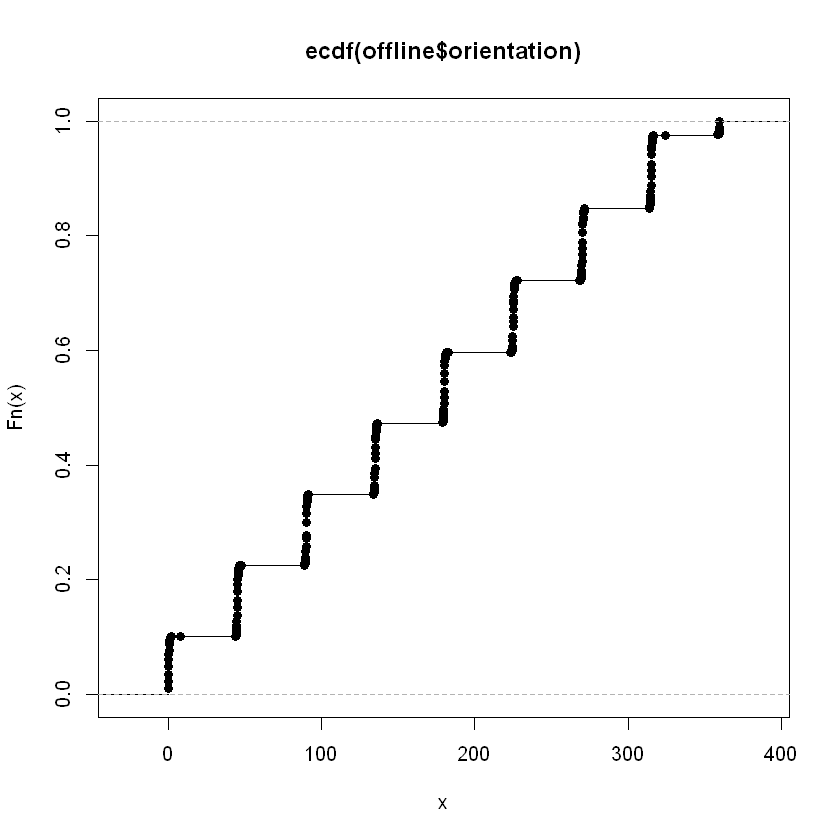

In [11]:
length(unique(offline$orientation))
plot(ecdf(offline$orientation)) 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

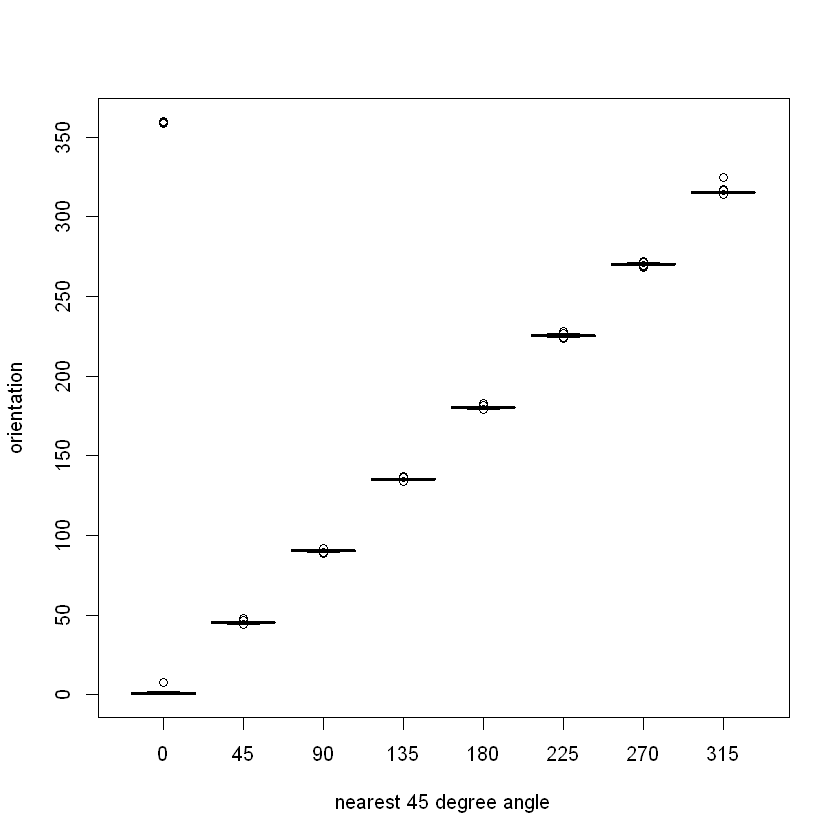

In [12]:
# it may be useful in our analysis to work with values corresponding to the
#8 equi-spaced angles. That is, we want to map 47.5 to 45, and 358.2 to 0,
#and so on. To do this, we take each value and ﬁnd out to which of the 8
#orientations it is closest and we return that orientation. We must handle
#values such as 358.2 carefully as we want to map them to 0, not to the 
#closer 315.

roundOrientation = function(angles) {
    refs = seq(0, by = 45, length = 9)
    q = sapply(angles, function(o) which.min(abs(o - refs)))
               c(refs[1:8], 0)[q] 
               }

offline$angle = roundOrientation(offline$orientation)

with(offline, boxplot(orientation ~ angle, xlab = "nearest 45 degree angle",
                                     ylab="orientation")) 

In [13]:
#check to see if there is a 1 - relationship betweeen mac and channel
table(offline$mac)


00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 

In [14]:
#there is a discrepancy with the documentation.
# keep the records from the top 7 devices
subMacs = names(sort(table(offline$mac), decreasing = TRUE))[1:7] 
offline = offline[ offline$mac %in% subMacs, ]
macChannel = with(offline, table(mac, channel))
apply(macChannel, 1, function(x) sum(x > 0))

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

In [15]:
#Indeed we see that there is a one-to-one correspondence between MAC address
#and channel for these 7 devices. This means we can eliminate channel from
#offline
offline = offline[ , "channel" != names(offline)]

In [16]:
locDF = with(offline,
             by(offline, list(posX, posY), function(x) x))
length(locDF)
sum(sapply(locDF, is.null))

#The null values correspond to the combinations of the xs and ys that were
#not observed. We drop these unneeded elements 
locDF = locDF[ !sapply(locDF, is.null) ]

length(locDF)

locCounts = sapply(locDF, nrow)

# if we want to keep the position information with the location
locCounts = sapply(locDF,
                   function(df)
                       c(df[1, c("posX", "posY")], count = nrow(df))) 

[1] 476

[1] 310

[1] 166

In [17]:
locCounts[ , 1:8]

posX,0,1,2,0,1,2,0,1
posY,0,0,0,1,1,1,2,2
count,5505,5505,5506,5524,5543,5558,5503,5564


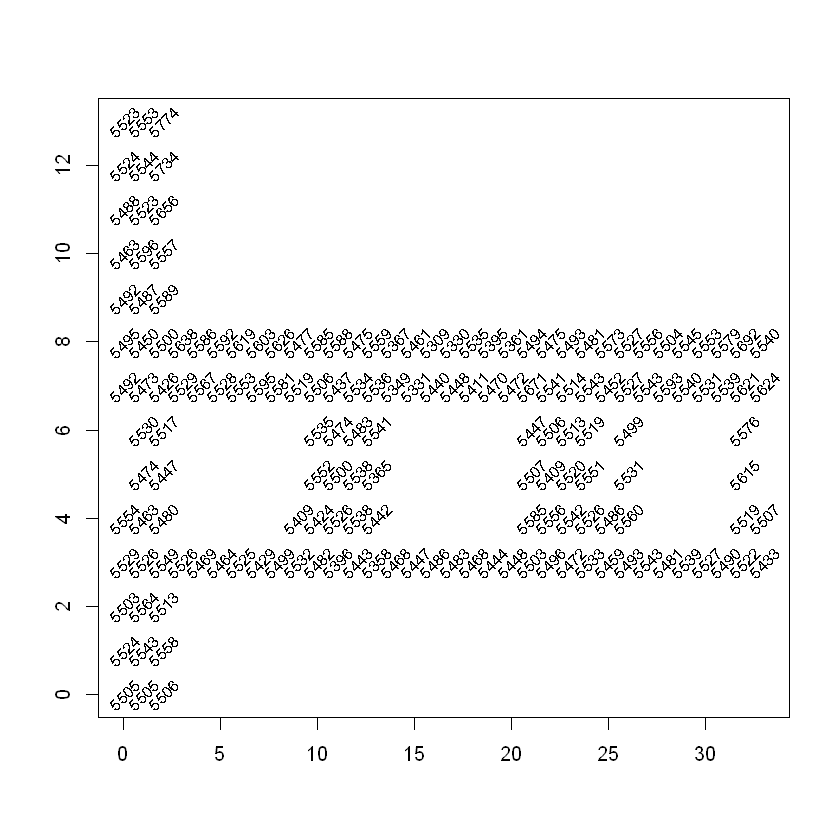

In [18]:
#there are roughly the same number of signals detected
#at each location.

locCounts = t(locCounts)
plot(locCounts, type = "n", xlab = "", ylab = "")
text(locCounts, labels = locCounts[,3], cex = .8, srt = 45) 

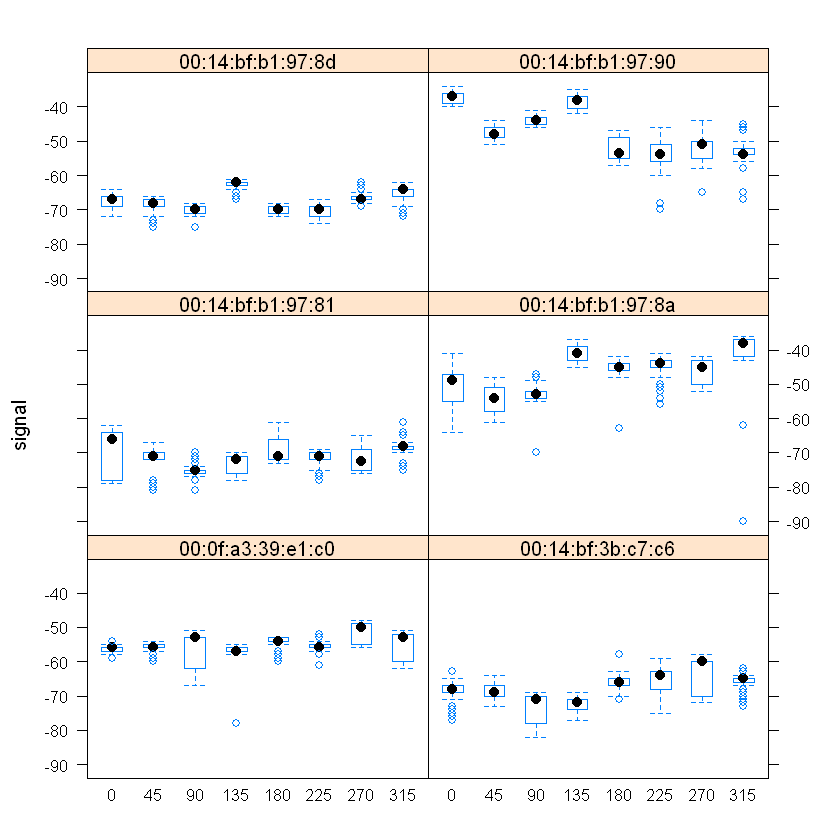

In [19]:
#checking distributions
library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offline,
       subset = posX == 2 & posY == 12
       & mac != "00:0f:a3:39:dd:cd",
       layout = c(2,3))